In [1]:
# Import pyNBS modules
from pyNBS import data_import_tools as dit
from pyNBS import network_propagation as prop
from pyNBS import pyNBS_core as core
from pyNBS import pyNBS_single
from pyNBS import consensus_clustering as cc
from pyNBS import pyNBS_plotting as plot

# Import other needed packages
import os
import time
import pandas as pd
import numpy as np
from IPython.display import Image

## Load Data
### Load binary somatic mutation data
First, we must load the somatic mutation and network data for running pyNBS. We will also set an output directory location to save our results.

In [2]:
maf_path = './GBMmaf.txt'
sm_path = './GBM_sm_data.txt'
dit.process_TCGA_MAF(maf_path, './GBM_sm_data.txt', verbose = True)

Binary somatic mutation matrix saved
MAF file processed: ./GBMmaf.txt 6.83 seconds.


In [3]:
sm_mat = pd.read_csv(sm_path, index_col = 0).astype(int)
sm_mat

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1253,pk
TCGA-12-0829,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TCGA-74-6573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-RR-A6KA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-12-0775,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-06-0145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-14-1829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-12-0818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-6698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Load molecular network
The network file is a 2-column text file representing an unweighted network. Each row represents a single edge in the molecular network.  

For more examples and definitions in the network file format, please see our Github Wiki page:  
https://github.com/huangger/pyNBS/wiki/Molecular-Network-File-Format

In [4]:
# The only required parameter for this function is the network file path

network_filepath = './Example_Data/Network_Files/CancerSubnetwork.txt'
network = dit.load_network_file(network_filepath)
network.nodes

Network File Loaded: ./Example_Data/Network_Files/CancerSubnetwork.txt


NodeView(('HSPA2', 'RPN1', 'GK2', 'HSPA6', 'PPP3R1', 'DLG1', 'YWHAH', 'HIST1H4I', 'HSPA8', 'PCSK6', 'PCSK7', 'PRPF8', 'TPI1', 'AKT3', 'IKBKG', 'SEC24D', 'DHX15', 'RFWD2', 'TYK2', 'PFKP', 'PPP3R2', 'MAP3K7', 'ACTG1', 'RARA', 'EP300', 'CACYBP', 'ACTG2', 'CDC73', 'PABPC3', 'CACNA1A', 'CACNA1B', 'CACNA1C', 'CACNA1E', 'CSNK2A2', 'HSP90AB1', 'PLK1', 'PERP', 'CAD', 'LIG1', 'HDAC2', 'NUP214', 'JAK2', 'LYN', 'CUL1', 'LIPA', 'IGF1R', 'DDX3X', 'GPI', 'CDKN2D', 'NUP98', 'CAMK2D', 'IDH2', 'IDH1', 'HK1', 'NUP93', 'CREB1', 'CD24', 'FXR1', 'TNFRSF21', 'STK3', 'STK4', 'TPR', 'EGFR', 'RFC2', 'GK', 'FGFR3', 'SHMT1', 'GMPS', 'MAPK14', 'ATIC', 'FN1', 'RPS6', 'PPP2CA', 'ACSL3', 'EIF4G1', 'FZR1', 'RBBP7', 'AKT2', 'GSK3B', 'TERF2', 'SYK', 'DDX6', 'XRN1', 'RAD23B', 'UBC', 'PGAM2', 'NTHL1', 'PGK1', 'YBX1', 'ELOC', 'PCNA', 'CTNND1', 'SEC31A', 'ALDH3A2', 'GSK3A', 'EIF4E1B', 'RPL5', 'GAPDH', 'HSP90B1', 'MYLK', 'RRAS', 'ACAA1', 'AKR1A1', 'FEN1', 'CLTC', 'TNPO1', 'STIP1', 'VIM', 'ACADM', 'HSPA1A', 'XRCC6', 'XPO1', '

# Construct regularization graph for use in network-regularized NMF

In this step, we will construct the graph used in the network-regularized non-negative matrix factorization (netNMF) step of pyNBS. This network is a K-nearest neighbor (KNN) network constructed from the network influence matrix (Vandin et al 2011*) of the molecular network being used to stratify tumor samples. The graph laplacian of this KNN network (knnGlap) is used as the regularizer in the following netNMF steps. This step uses the ```network_inf_KNN_glap``` function in the pyNBS_core module. 

For additional notes on the graph laplacian construction method, please visit our GitHub wiki for this function:
https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_core.network_inf_KNN_glap

---
**Note: ** This step is technically optional. No regularization network laplacian has to be constructed if the user would like to run the NMF step without a network regularizer. The user simply has to pass ```None``` into the optional parameter ```regNet_glap``` or remove the optional parameter in the ```pyNBS_single()``` function call below. This will cause pyNBS to run a non-network regularized NMF procedure. However, given the implementation of the multiplicative update steps, the results may not be exactly the same as some other NMF implementations (e.g. from scikit-learn).

In [5]:
# Constructing knnGlap
knnGlap = core.network_inf_KNN_glap(network)

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the KNN graph laplaican to the output directory 'outdir' given above:
# Uncomment and run the following line instead:
# knnGlap = core.network_inf_KNN_glap(network, **save_args)
##########################################################################################################

Graph influence matrix calculated: 0.8518772125244141 seconds
Graph laplacian of KNN network from influence matrix calculated: 3.08023738861084 seconds


In [6]:
knnGlap

,HSPA2,PCSK6,EIF4E1B,CD24,PGAM4,PGK2,CARS,GK2,ACSS1,MLH3,...,WNT8B,MAP2K6,FZD7,WNT10B,GDF5,WNT2B,CDX2,IRAK2,WNT7B,WNT16
HSPA2,10,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
PCSK6,-1,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EIF4E1B,-1,0,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD24,-1,0,0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGAM4,-1,0,0,0,48,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WNT2B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
CDX2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0
IRAK2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
WNT7B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0


# Construct network propagation kernel matrix
Due to the multiple subsampling and propagation steps used in pyNBS, we have found that the algorithm can be significantly sped up for large numbers of subsampling and propagation iterations if a gene-by-gene matrix describing the influence of each gene on every other gene in the network by the random-walk propagation operation is pre-computed. We refer to this matrix as the "network propagation kernel". Here we compute this propagation kernel by propagating the all genes in the molecular network independently of one another. The propagation profile of each tumor is then simply the column sum vector of the resulting network propagation kernel selected for only the rows of genes marked as mutated in each tumor, rather than having to perform the full network propagation step again after each subsampling of the data. 

For additional notes on the propagation methods used, please visit our GitHub wiki for this function:
https://github.com/huangger/pyNBS/wiki/pyNBS.network_propagation.network_propagation


### Calibrating the network propagation coefficient
The current network propagation coefficient ($\alpha$) is currently set to 0.7 and must range between 0 and 1. This parameter can be tuned and changing it may have a result on the final propagation results. Previous results from [Hofree et al 2013](https://www.nature.com/articles/nmeth.2651) suggest that values between 0.5 and 0.8 produce relatively robust results, but we suspect that the optimal value may be dependent on certain network properties such as edge density.

In [7]:
# Set or change network propagation coefficient if desired
alpha = 0.7

In [8]:
# Construct identity matrix of network
network_nodes = network.nodes()
network_I = pd.DataFrame(np.identity(len(network_nodes)), index=network_nodes, columns=network_nodes)

In [9]:
# Construct network propagation kernel
kernel = prop.network_propagation(network, network_I, alpha=alpha, symmetric_norm=False)

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the propagation kernel to the output directory 'outdir' given above,
# Uncomment and run the following two lines instead of the above line:
# save_args['iteration_label']='kernel'
# kernel = prop.network_propagation(network, network_I, alpha=alpha, symmetric_norm=True, **save_args)
##########################################################################################################

Performing network propagation with alpha: 0.7
Network Propagation Complete: 2.2716429233551025 seconds


In [10]:
kernel

,HSPA2,RPN1,GK2,HSPA6,PPP3R1,DLG1,YWHAH,HIST1H4I,HSPA8,PCSK6,...,JMJD7-PLA2G4B,MALAT1,REG3G,NUTM2A,TRB,IGL,HES3,CCL15,CCL4L2,SCUBE1
HSPA2,0.301161,0.000956,0.000756,0.001607,0.000843,0.000995,0.001226,0.001015,0.001913,0.000658,...,0.000010,0.000001,8.587660e-07,1.228380e-06,9.786070e-07,8.628454e-07,0.000002,1.167224e-06,1.425421e-06,0.000004
RPN1,0.002033,0.300840,0.000080,0.002078,0.000182,0.000354,0.001989,0.000374,0.002458,0.000031,...,0.000031,0.000001,8.347618e-07,1.506721e-06,1.171929e-06,1.253445e-06,0.000002,1.103068e-06,1.402252e-06,0.000002
GK2,0.004539,0.000225,0.301491,0.004585,0.000243,0.000275,0.000380,0.000287,0.004798,0.000071,...,0.000014,0.000001,1.854933e-06,1.054814e-06,1.049891e-06,1.097301e-06,0.000004,2.528822e-06,2.167794e-06,0.000002
HSPA6,0.001356,0.000825,0.000645,0.301138,0.000712,0.000862,0.001064,0.000894,0.001676,0.000029,...,0.000013,0.000004,1.249675e-06,1.129278e-06,1.257611e-06,7.627595e-07,0.000002,3.436474e-06,3.418481e-06,0.000003
PPP3R1,0.001901,0.000193,0.000091,0.001902,0.301018,0.000488,0.001999,0.000301,0.002241,0.000043,...,0.000012,0.000001,1.101603e-06,1.538312e-06,1.154950e-06,7.076435e-07,0.000002,1.579535e-06,1.698535e-06,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IGL,0.000290,0.000198,0.000061,0.000304,0.000105,0.000466,0.000177,0.000092,0.000406,0.000020,...,0.000006,0.000001,6.062103e-07,6.784775e-07,5.928115e-07,3.420842e-01,0.000002,8.321551e-07,8.988069e-07,0.000001
HES3,0.000189,0.000085,0.000066,0.000215,0.000096,0.000214,0.000227,0.000173,0.000371,0.000043,...,0.000007,0.000001,1.084281e-06,6.428052e-07,7.739368e-07,7.895690e-07,0.306965,1.350374e-06,1.528725e-06,0.000002
CCL15,0.000131,0.000058,0.000047,0.000456,0.000078,0.000144,0.000159,0.000098,0.000271,0.000021,...,0.000006,0.000001,3.651458e-06,4.230124e-07,2.179614e-06,2.773850e-07,0.000001,3.007345e-01,1.846477e-04,0.000001
CCL4L2,0.000160,0.000074,0.000040,0.000454,0.000084,0.000163,0.000198,0.000123,0.000315,0.000024,...,0.000020,0.000005,1.208990e-05,5.961497e-07,1.772411e-06,2.996023e-07,0.000002,1.846477e-04,3.013736e-01,0.000002


# Subsampling, propagation, and netNMF
After the pre-computation of the regularization graph laplacian and the network propagation kernel, we perform the following core steps of the NBS algorithm multiple times (default=100x) to produce multiple patient clusterings that will be used in the later consensus clustering step. Each patient clustering is performed with the following steps:  
  
 1. **Subsample binary somatic mutation data.** (See the documentation for the [```subsample_sm_mat```](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_core.subsample_sm_mat) function for more details.)
 2. **Propagate binary somatic mutation data over network.** (See the documentation for the [```network_propagation```](https://github.com/huangger/pyNBS/wiki/pyNBS.network_propagation.network_propagation) or [```network_kernel_propagation```](https://github.com/huangger/pyNBS/wiki/pyNBS.network_propagation.network_propagation) function for more details.)
 3. **Quantile normalize the network-smoothed mutation data.** (See the documentation for the [```qnorm```](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_core.qnorm) function for more details.) 
 4. **Use netNMF to decompose network data into k clusters.** (See the documentation for the [```mixed_netNMF```](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_core.mixed_netNMF) function for more details.)
  
These functions for each step here are wrapped by the [```NBS_single```](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_single.NBS_single) function, which calls each step above in sequence to perform a single iteration of the pyNBS algorithm.

### Number of pyNBS clusters
The default number of clusters constructed by pyNBS is k=3. We change that definition explicitly below or in the parameters for [```NBS_single```](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_single.NBS_single), and in this example we choose 4 clusters. Other parameters such as the subsampling parameters and the propagation coefficient (when no kernel is pre-computed) can also be changed using \*\*kwargs. \*\*kwargs can also will hold the values of \*\*save_args as seen in previous functions if the user would like to save the resulting dimension reduced patient profiles. All documentation of \*\*kwargs definitions are given in the Github wiki page for [```NBS_single```](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_single.NBS_single)

### Number of pyNBS iterations
The consensus clustering step of the pyNBS algorithm will improve if the data is subsampled, and re-clustered multiple times. The default number of times we perform the aforementioned operation (```niter```) is 100 times. The number can be reduced for faster run-time, but may produce less robust results. Increasing ```niter``` will increase overall runtime, but should produce more robust cluster assignments during consensus clustering.

In [11]:
clusters = 4

# Set the number of times to perform pyNBS core steps
niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/CancerSubnetwork_GBM/'+'c'+str(clusters)+'_i'+str(niter)+'/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'CS_c'+str(clusters)+'_i'+str(niter)

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [12]:
# Optional: Saving the intermediate propagation step (from subsampled data) to file
# save_args['save_prop'] = True

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat, knnGlap, propNet=network, propNet_kernel=kernel, k=clusters))
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist.append(pyNBS_single.NBS_single(sm_mat, propNet=network, propNet_kernel=kernel, regNet_glap=knnGlap, 
    #                                      k=clusters, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print ('NBS iteration:', i+1, 'complete:', t, 'seconds')

/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 1 complete: 27.15956401824951 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 2 complete: 26.745187997817993 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 3 complete: 26.50362229347229 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 4 complete: 24.309383869171143 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 5 complete: 26.91936469078064 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 6 complete: 28.2825186252594 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 7 complete: 26.699289321899414 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 8 complete: 26.512134790420532 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 9 complete: 26.651692152023315 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 10 complete: 25.523460626602173 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 11 complete: 26.199326992034912 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 12 complete: 26.453166246414185 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 13 complete: 26.406745433807373 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 14 complete: 26.157381296157837 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 15 complete: 27.613131999969482 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 16 complete: 27.564996242523193 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 17 complete: 25.94117021560669 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 18 complete: 28.05966830253601 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 19 complete: 27.248538732528687 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 20 complete: 26.00609040260315 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 21 complete: 27.963265657424927 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 22 complete: 26.08824634552002 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 23 complete: 26.151729822158813 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 24 complete: 26.86781907081604 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 25 complete: 25.163218021392822 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 26 complete: 26.69488000869751 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 27 complete: 27.17503261566162 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 28 complete: 25.675713777542114 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 29 complete: 27.093511819839478 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 30 complete: 26.275076150894165 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 31 complete: 25.232703924179077 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 32 complete: 26.426940202713013 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 33 complete: 26.758179426193237 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 34 complete: 25.712363719940186 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 35 complete: 27.712636947631836 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 36 complete: 26.030019283294678 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 37 complete: 26.953946113586426 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 38 complete: 26.889431715011597 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 39 complete: 22.52047610282898 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 40 complete: 22.676448106765747 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 41 complete: 24.022493839263916 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 42 complete: 22.388935089111328 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 43 complete: 25.156270265579224 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 44 complete: 24.68449640274048 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 45 complete: 25.625185251235962 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 46 complete: 25.271135091781616 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 47 complete: 24.094903230667114 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 48 complete: 23.09660267829895 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 49 complete: 22.218533992767334 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 50 complete: 23.011226415634155 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 51 complete: 23.40522074699402 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 52 complete: 23.703351259231567 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 53 complete: 22.8751003742218 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 54 complete: 23.301307439804077 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 55 complete: 23.648588180541992 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 56 complete: 24.04520082473755 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 57 complete: 24.596899032592773 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 58 complete: 22.297253608703613 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 59 complete: 23.88523554801941 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 60 complete: 25.11132001876831 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 61 complete: 23.32781720161438 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 62 complete: 23.13442349433899 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 63 complete: 22.351221084594727 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 64 complete: 21.253312826156616 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 65 complete: 23.35655641555786 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 66 complete: 23.60606336593628 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 67 complete: 23.089296579360962 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 68 complete: 23.851444959640503 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 69 complete: 23.403895616531372 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 70 complete: 23.365447282791138 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 71 complete: 24.00503134727478 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 72 complete: 24.262338876724243 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 73 complete: 22.032837867736816 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 74 complete: 24.549582719802856 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 75 complete: 23.576745748519897 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 76 complete: 22.199321508407593 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 77 complete: 23.51319193840027 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 78 complete: 25.2547025680542 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 79 complete: 22.80121159553528 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 80 complete: 22.943495750427246 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 81 complete: 22.748714685440063 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 82 complete: 21.71754741668701 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 83 complete: 23.597731113433838 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 84 complete: 23.678165197372437 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 85 complete: 23.64856481552124 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 86 complete: 23.218583583831787 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 87 complete: 23.20849108695984 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 88 complete: 23.714904069900513 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 89 complete: 23.760717630386353 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 90 complete: 24.35700011253357 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 91 complete: 22.691763401031494 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 92 complete: 23.506386518478394 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 93 complete: 23.746458292007446 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 94 complete: 22.708777904510498 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 95 complete: 24.21928381919861 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 96 complete: 25.85757565498352 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 97 complete: 31.38491439819336 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 98 complete: 30.206283569335938 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 99 complete: 30.214683771133423 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 100 complete: 31.290799140930176 seconds


# Consensus Clustering
In order to produce robust patient clusters, the sub-sampling and re-clustering steps as done above are needed. After the patient data is subsampled multiple times (default ```niter```=100), we perform the [```consensus_hclust_hard```](https://github.com/huangger/pyNBS/wiki/pyNBS.consensus_clustering.consensus_hclust_hard) function in the conensus_clustering module. It accepts a list of pandas dataframes as generated in the previous step. If the H matrices were generated separately and saved to a directory, the user will need to manually import those H matrices into a python list first before passing the list to the function below. 

For more information on how the consensus clustering is performed, please see our wiki page on this function:
https://github.com/huangger/pyNBS/wiki/pyNBS.consensus_clustering.consensus_hclust_hard

In [13]:
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

Constructing Hlist: 100 cluster matrices,  389 samples
Hlist consensus constructed and sample clusters assigned


# Co-Clustering Map
To visualize the clusters formed by the pyNBS algorithm, we can plot a similarity map using the objects created in the previous step. This step uses the [`cluster_color_assign`](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_plotting.cluster_color_assign) and [`plot_cc_map()`](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_plotting.plot_cc_map) functions in the [`pyNBS_plotting`](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_plotting) module.

In [14]:
# Assign colors to clusters from pyNBS
pyNBS_GBM_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='GBM Cluster Assignments')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_GBM_clust_cmap, **save_args)

Co-Clustering Map plotted


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_plotting.py:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


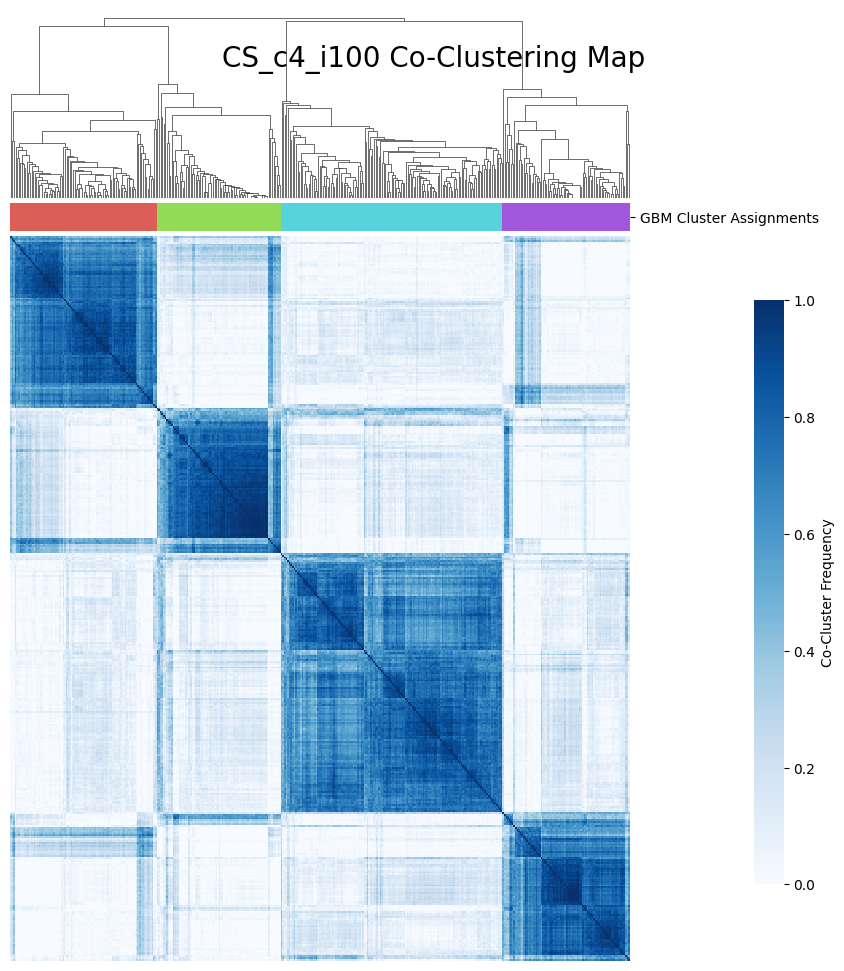

In [15]:
Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

# Survival analysis
To determine if the patient clusters are prognostically relevant, we perform a standard survival analysis using a multi-class logrank test to evaluate the significance of survival separation between patient clusters. This data is plotted using a Kaplan-Meier plot using the [`cluster_KMplot()`](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_plotting.cluster_KMplot) in the [`pyNBS_plotting`](https://github.com/huangger/pyNBS/wiki/pyNBS.pyNBS_plotting) module. 


In order to plot the survival differences between clusters, we will need to load survival data for each patient. This data was extracted from TCGA clinical data. The survival data is given in a 5-column delimited table with the specific headings described below (the columns must be in the same order as shown below). The following is an example of a few lines of the a survival table:  

||vital_status|days_to_death|days_to_last_followup|overall_survival|
|-|-|-|-|-|
|TCGA-2E-A9G8|0|0|1065|1065|
|TCGA-A5-A0GI|0|0|1750|1750|
|TCGA-A5-A0GM|0|0|1448|1448|
|TCGA-A5-A1OK|0|0|244|244|
|TCGA-A5-AB3J|0|0|251|251|

Additional details on the survival data file format is also describe on our Github wiki at: 
https://github.com/huangger/pyNBS/wiki/Patient-Survival-Data-File-Format

Note: The default setting for pyNBS is that no survival curves are drawn because the survival data is not a required parameter. The path to valid survival data must be explicitly defined.

In [16]:
gbm_clinical_path = './gbm_clinical.csv'
gbm_clinical = pd.read_csv(gbm_clinical_path, index_col = 0)

gbm_clinical = gbm_clinical[['submitter_id','vital_status','days_to_death','days_to_last_follow_up']]
# gbm_clinical.dropna(subset= ['vital_status'], inplace =True)

gbm_clinical = gbm_clinical.replace({'Dead': 1, 'Alive' : 0, 'Not Reported': 0}).fillna(0)

gbm_clinical['overall_survival'] = [ max(i,j) for i,j in 
                                    zip(gbm_clinical['days_to_death'],gbm_clinical['days_to_last_follow_up'])]

# gbm_clinical['days_to_last_follow_up'].unique()
gbm_clinical

,submitter_id,vital_status,days_to_death,days_to_last_follow_up,overall_survival
1,TCGA-02-0339,1.0,377.0,377.0,377.0
2,TCGA-12-0820,1.0,562.0,562.0,562.0
3,TCGA-06-0209,1.0,232.0,119.0,232.0
4,TCGA-06-6390,1.0,164.0,164.0,164.0
5,TCGA-4W-AA9R,0.0,0.0,124.0,124.0
...,...,...,...,...,...
613,TCGA-08-0627,0.0,0.0,0.0,0.0
614,TCGA-16-1048,0.0,0.0,0.0,0.0
615,TCGA-02-0250,0.0,0.0,0.0,0.0
616,TCGA-06-0681,0.0,0.0,0.0,0.0


Multi-Class Log-Rank P: 0.0008933269159518827
Kaplan Meier Plot constructed


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_plotting.py:107: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


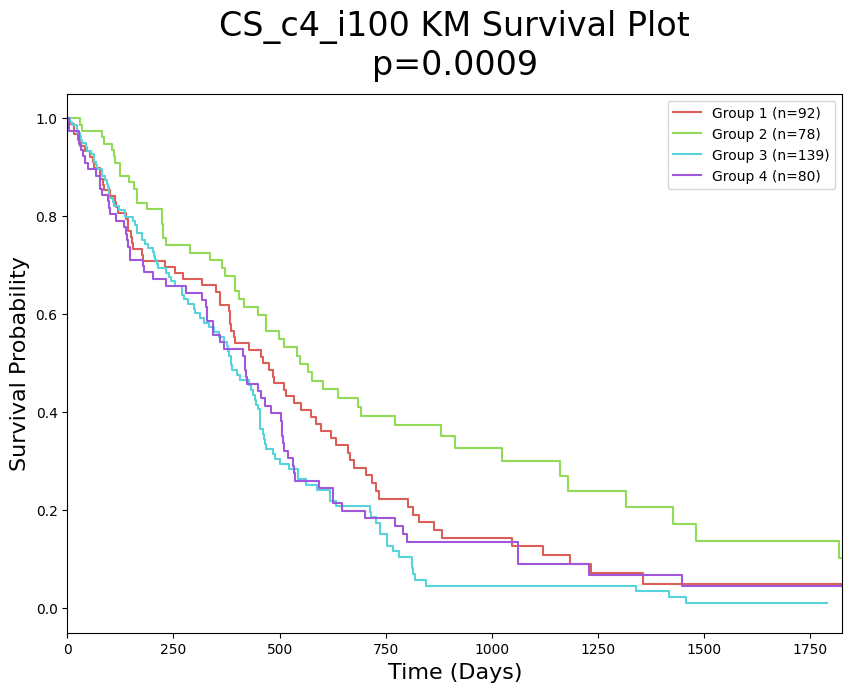

In [17]:
# survival Data
surv_data = './survival_GBM.csv'

gbm_clinical.to_csv(surv_data, index = False)

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)